# Churn Prediction

library yang mau di import

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

## Mempersiapkan Dataset

Sebagai training dataset, kita menggunakan daftar pelanggan yang menggunakan jasa ABC Telekom. Dataset berisi sepuluh ribu example, berisikan nomor pelanggan, jenis kartu prabayar yang digunakan, berapa jumlah isi ulang pulsa, berapa lama pelanggan tersebut telah menjadi pelanggan dan pemakaian internetnya beberapa bulan terakhir.

Nama Feature | Penjelasan feature
----|----
customer_id | Nomor pelanggan (berupa kode). Ini kita jadikan index
product | Merk dagang produk kartu yang digunakan
reload_1 | Isi ulang pulsa 1 bulan lalu (dalam Rupiah)
reload_2 | Isi ulang pulsa 2 bulan lalu (dalam Rupiah)
video | Penggunaan aplikasi video rata-rata per bulan (dalam Rupiah)
music | Penggunaan aplikasi musik rata-rata per bulan (dalam Rupiah)
games | Penggunaan game rata-rata per bulan (dalam Rupiah)
chat_1 | Penggunaan online chat 1 bulan lalu (dalam Rupiah)
chat_2 | Penggunaan online chat 2 bulan lalu (dalam Rupiah)
socmed_1 | Penggunaan media sosial 1 bulan lalu (dalam Rupiah)
socmed_2 | Penggunaan media sosial 2 bulan lalu (dalam Rupiah)
internet | Penggunaan internet total 1 bulan terakhir (dalam Rupiah)
days_active | Jumlah hari aktif menggunakan layanan dalam sebulan terakhir
tenure | Berapa lama sudah menjadi pelanggan (dalam hari)
churn | "0" bila pelanggan masih aktif, "1" bila sudah tidak menjadi pelanggan. Ini yang dijadikan target/label prediksi

Mengambil dataset

In [2]:
df1 = pd.read_csv('churnprediction.csv', sep = ',',index_col = ['customer_id'])

Program di atas menggunakan kolom customer_id sebagai index, karena kolom inilah yang berisikan nomor kode pelanggan yang menjadi identitias unik setiap pelanggan.

In [3]:
df1.head()

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,Kartu A,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,Kartu A,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,Kartu A,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,Kartu A,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,Kartu A,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0


Kolom paling kanan adalah label yang menunjukkan pelanggan telah berhenti berlangganan (churn "1") atau masih aktif (churn = "0"). Inilah yang akan kita jadikan target prediksi kita.

In [4]:
# info() digunakan untuk menampilkan informasi detail tentang dataframe, seperti jumlah baris data, nama-nama kolom berserta jumlah data dan tipe datanya, dan sebagainya.

df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 285fae8412c4720a0c79d95f98434422 to 2c5bc32bc9a9c393d393bfc11c409b0d
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product      10000 non-null  object 
 1   reload_1     10000 non-null  float64
 2   reload_2     10000 non-null  float64
 3   video        10000 non-null  float64
 4   music        10000 non-null  float64
 5   games        10000 non-null  float64
 6   chat_1       10000 non-null  float64
 7   chat_2       10000 non-null  float64
 8   socmed_1     10000 non-null  float64
 9   socmed_2     10000 non-null  float64
 10  internet     10000 non-null  float64
 11  days_active  10000 non-null  int64  
 12  tenure       10000 non-null  int64  
 13  churn        10000 non-null  int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 1.1+ MB


Karena pelanggan yang masih aktif dan pelanggan yang sudah berhenti berlangganan masih tercampur di dalam dataset ini, perlu dilihat perbandingan keduanya secara visual berupa pie chart dengan bantuan library Matplotlib.

In [6]:
# Perintah Group by pada Pandas DataFrame menyediakan fungsi untuk mengelompokkan data.

# Count () adalah fungsi bawaan dengan Python. Ini akan mengembalikan jumlah total elemen yang diberikan dalam sebuah string. Penghitungan dimulai dari awal string sampai akhir.

dfAktifChurn = df1.groupby('churn').count()

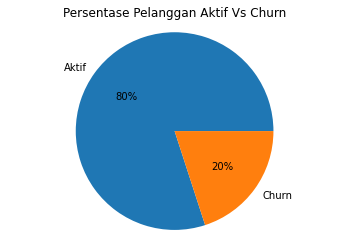

In [10]:
plt.pie(dfAktifChurn['product'], labels = ['Aktif','Churn'], autopct = '%1.0f%%')
plt.title('Persentase Pelanggan Aktif Vs Churn')
plt.axis('equal')
plt.show()


Terlihat bahwa di dalam dataset ada dua kelompok pelanggan, yaitu 20% pelanggan yang sudah churn dan sisanya 80% yang masih aktif.

Ada satu hal yg perlu mendapat perhatian yaitu feature "product". apa saja isi kolo ini?

In [11]:
# value_counts() Berguna untuk menghitung berapa kali sebuah value terdapat dalam dataset.
df1['product'].value_counts()

Kartu C    7548
Kartu B    1679
Kartu A     773
Name: product, dtype: int64

Karena masih berupa teks berisi nama-nama produk ("Kartu A", "Kartu B", dan "Kartu C"), maka feature ini harus diubah menjadi numerik. Cara yang paling umum adalah dengan metode one-hot encoding, yaitu menuliskan semua nilai yang mungkin muncul menjadi kolom kemudian memberikan nilai 0 dan 1 di kolom tersebut, tergantung pada pelanggan yang diwakili di setiap baris apakah menggunakan produk yang bersangkutan. Dalam kasus kita, karena ada tiga produk, maka akan ada tiga kolom baru.

In [12]:
# Fungsi get_dummies digunakan untuk mengubah variabel kategorikal menjadi variabel numerikal dengan melakukan proses One-Hot-Encode terhadap variabel kategorikal.

pd.get_dummies(df1['product'])

,Kartu A,Kartu B,Kartu C
customer_id,,,
285fae8412c4720a0c79d95f98434422,1,0,0
f45bce87ca6bf100f222fcc0db06b624,1,0,0
09b54557b1e2a10d998e3473a9ccd2a0,1,0,0
11f252f48be36f93dd429f2ec86cb2f5,1,0,0
a8df29ae9195eea348d2f74c967b978d,1,0,0
...,...,...,...
9e8b318d96caa9c0c4a50e8e59f5026c,0,1,0
a310627191bdbded3905ac73e77fe319,0,1,0
b6f11059e5c1df69b8c16d5c39af23dc,0,1,0


Menghapus dan memasukan data yg sudah di on-hot encoding

In [14]:
# Pada Pandas, fungsi "concat()" digunakan untuk menggabungkan dua atau lebih DataFrame atau Series.

df2 = pd.concat([df1, pd.get_dummies(df1['product'])], axis=1, sort=False)

# fungsi drop() adalah utk menghapus kolom product
df2.drop(['product'], axis=1, inplace=True)